In [68]:
import math
import numpy as np
from IPython.display import clear_output
import pdb
import time

import matplotlib.pyplot as plt

import torch
from torch import Tensor
from torch import nn
from torch.nn  import functional as F 
from torch.autograd import Variable
from torchdiffeq import odeint_adjoint as odeint
from torch.distributions import MultivariateNormal
use_cuda = torch.cuda.is_available()
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import gc
import importlib
import Utils
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory
from Utils import SaveTrajectory as st
import ODEModel
importlib.reload(ODEModel)
from ODEModel import ODEfunc
from ODEModel import FfjordModel
import LearnTraj
importlib.reload(LearnTraj);
from LearnTraj import learn_trajectory


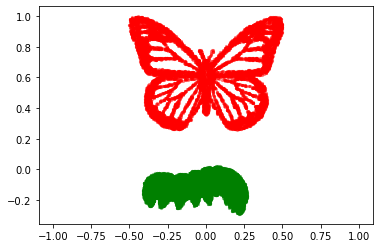

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
caterpillar = 1-ImageDataset.import_img('caterpillar.png'); caterpillar/=caterpillar.max();
butterfly = 255-ImageDataset.import_img('butterfly.jpg'); butterfly/=butterfly.max();
circle = 255-ImageDataset.import_img('circle.jpeg'); circle/=circle.max();
square = 1-ImageDataset.import_img('square.png'); square/=square.max();
dset1 = ImageDataset(img=caterpillar*1,thresh=.8); 
dset2 = ImageDataset(img=butterfly*1,thresh=.8)
dset3 = ImageDataset(img=circle*1,thresh=.8)
dset4 = ImageDataset(img=square*1,thresh=.8)

n = 10000; 
dat1 = dset1.sample(n); 
dat2 = dset2.sample(n); 
dat3 = dset3.sample(n)*.7;
dat4 = dset4.sample(n);
dat1*=-1; dat1[:,1]-=.1;
dat2*=-1; dat2[:,1]+=.5; 
dat3[:,1]+=.1;

plt.scatter(dat1.detach().numpy()[:,0],dat1.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='green')
plt.scatter(dat2.detach().numpy()[:,0],dat2.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='red')
# plt.scatter(dat3.detach().numpy()[:,0],dat3.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='magenta')
# plt.scatter(dat4.detach().numpy()[:,0],dat4.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='orange')
plt.axis('equal')
plt.show() 

training with sinkhorn_large_reg
0.001
batch 0 loss tensor(2., device='cuda:0', grad_fn=<AddBackward0>)


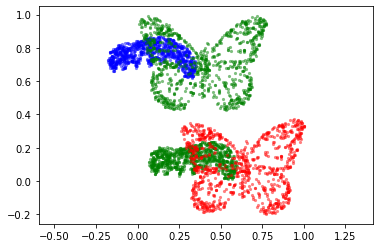

fit time  0.08119893074035645  reg loss time 0.006792783737182617
time elapsed 0.6848709583282471 total time 0.6848652362823486
batch number 0 out of 300
0.001
batch 30 loss tensor(0.1057, device='cuda:0', grad_fn=<AddBackward0>)


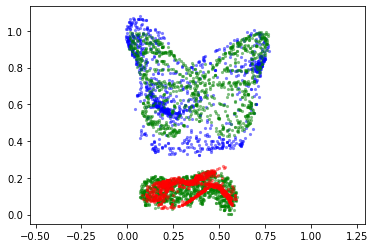

fit time  0.1192927360534668  reg loss time 0.0055277347564697266
time elapsed 17.304736137390137 total time 22.399463415145874
batch number 30 out of 300
0.001
batch 60 loss tensor(0.0147, device='cuda:0', grad_fn=<AddBackward0>)


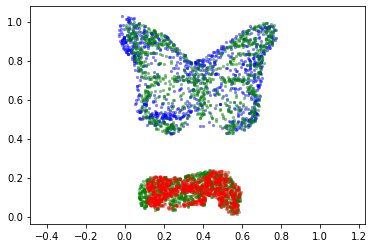

fit time  0.11223578453063965  reg loss time 0.005513191223144531
time elapsed 15.538462162017822 total time 42.38191485404968
batch number 60 out of 300
0.001
batch 90 loss tensor(0.0142, device='cuda:0', grad_fn=<AddBackward0>)


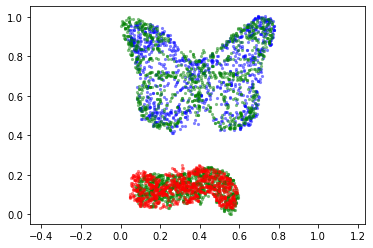

fit time  0.10684490203857422  reg loss time 0.005699634552001953
time elapsed 14.474060535430908 total time 61.25340390205383
batch number 90 out of 300
0.001
batch 120 loss tensor(0.0069, device='cuda:0', grad_fn=<AddBackward0>)


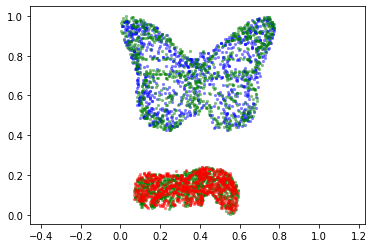

fit time  0.09921479225158691  reg loss time 0.00542449951171875
time elapsed 14.318966627120972 total time 80.03453278541565
batch number 120 out of 300
0.001
batch 150 loss tensor(0.0094, device='cuda:0', grad_fn=<AddBackward0>)


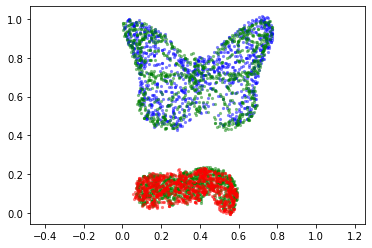

fit time  0.10706520080566406  reg loss time 0.005417823791503906
time elapsed 13.78397798538208 total time 98.21086621284485
batch number 150 out of 300
0.001
batch 180 loss tensor(0.0079, device='cuda:0', grad_fn=<AddBackward0>)


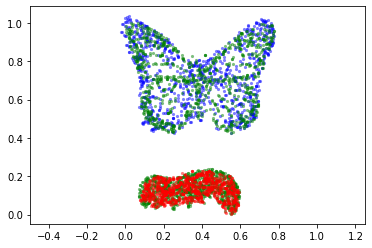

fit time  0.10382461547851562  reg loss time 0.005738973617553711
time elapsed 14.295324563980103 total time 116.89604449272156
batch number 180 out of 300
0.001
batch 210 loss tensor(0.0112, device='cuda:0', grad_fn=<AddBackward0>)


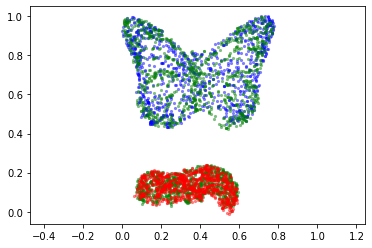

fit time  0.10903453826904297  reg loss time 0.005482912063598633
time elapsed 13.880608320236206 total time 135.10047125816345
batch number 210 out of 300
0.001
batch 240 loss tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>)


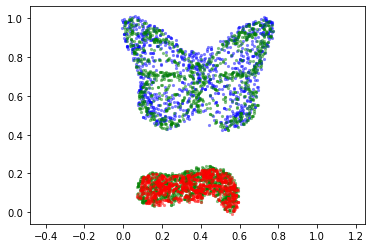

fit time  0.10969924926757812  reg loss time 0.005836009979248047
time elapsed 14.135608673095703 total time 153.53946018218994
batch number 240 out of 300
0.001
batch 270 loss tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>)


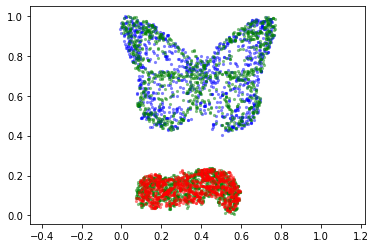

fit time  0.10489654541015625  reg loss time 0.005438089370727539
time elapsed 13.871084213256836 total time 171.80437803268433
batch number 270 out of 300


<Figure size 432x288 with 0 Axes>

In [70]:
dat_tuple = (dat1,dat2)
z_target = torch.stack(dat_tuple).to(device)
model = FfjordModel(); 
# model.load_state('models/seq_state420_time_31.615391731262207.tar');
# model.load_state('models/state310_time_22.49951934814453.tar');
# model.load_state('models/state_start11.tar');
# for my_loss in ['sinkhorn_small_reg']:
# my_loss = 'sinkhorn_small_reg';
my_loss = 'sinkhorn_large_reg';
# %prun 
model, losses, separate_losses = learn_trajectory(z_target, my_loss=my_loss,n_iters=300,n_subsample=1000, model=model, save=True)
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500)
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500,reverse=True)

In [55]:
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500)
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500,reverse=True)

<Figure size 432x288 with 0 Axes>

In [ ]:
# Example with 2 timesteps
dset = ImageDataset(img=make_image())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dat = dset.sample(512)
dat2 = torch.add(dat,torch.tensor([10,-10]))

dat_tuple = (dat,dat2)
z_target = torch.stack(dat_tuple).to(device)

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=1000)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


In [ ]:
#trying other shapes

square = np.zeros([20,20])
square[6:14,:8] = 1

two_square = np.zeros([20,20])
two_square[:5,14:] = 1
two_square[15:,14:] = 1


annulus = import_img('annulus.png')
circle = 255-import_img('circle.jpeg')

dset = ImageDataset(img=square)
dset1 = ImageDataset(img=two_square)

n = 500
dat = dset.sample(n)
dat1 = dset1.sample(n)
plt.scatter(dat.detach().numpy()[:,0],dat.detach().numpy()[:,1],s=2.3, alpha=0.1, linewidths=5,c='green')
plt.scatter(dat1.detach().numpy()[:,0],dat1.detach().numpy()[:,1],s=2.3, alpha=0.1, linewidths=5,c='red')
plt.show() 

In [ ]:
# make half moon dataset
import sklearn.datasets

moons, labels = sklearn.datasets.make_moons(n,noise=.1) #generates two half moons
mask = (labels == 0)
one_moon = moons[mask,:] # only keep one moon

def rot_mat(theta0):
    #computes rotation matrix of angle theta
    return np.array([[np.cos(theta0),-np.sin(theta0)],[np.sin(theta0),np.cos(theta0)]])

theta0 = np.pi/2
theta1 = np.pi

rot0 = rot_mat(theta0)
rot1 = rot_mat(theta1)

# apply rotation to the moon
one_moon_rot0 = np.dot(one_moon,rot0)
one_moon_rot1 = np.dot(one_moon,rot1)

In [ ]:
#visualize rotated moons

plt.scatter(one_moon[:,0],one_moon[:,1], color='blue')
plt.scatter(one_moon_rot0[:,0],one_moon_rot0[:,1], color='orange')
plt.scatter(one_moon_rot1[:,0],one_moon_rot1[:,1], color='green')

In [ ]:
# with three timesteps

dat = torch.tensor(one_moon,dtype=torch.float)
dat0 = torch.tensor(one_moon_rot0,dtype=torch.float)
dat1 = torch.tensor(one_moon_rot1,dtype=torch.float)

dat_tuple = (dat,dat0,dat1)
z_target = torch.stack(dat_tuple).to(device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=500)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


In [ ]:
# with two timesteps


dat_tuple = (dat,dat0)
z_target = torch.stack(dat_tuple).to(device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=500)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


<class 'torch.Tensor'> torch.Size([256, 2])
torch.Size([2])
torch.Size([0])


ValueError: x and y must have same first dimension, but have shapes (0,) and (2,)

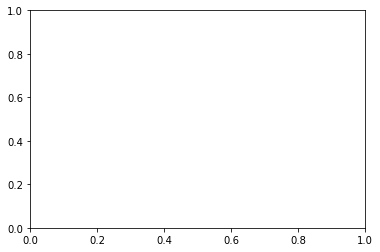

In [61]:
# test what weights are given to what frequencies
for param in model.parameters():
    print(type(param.data), param.size())
    pdat = param.data;
    break;    
pmags = torch.norm(param.data,p=2,dim=0);
print(pmags[0:200].size())

freqs = model.time_deriv_func.imap.B;
fmags = torch.norm(freqs,p=2,dim=1);
xyfreqs = torch.cat([fmags, fmags],dim=0);
print(xyfreqs.size())

# xyfreqs.cpu().numpy()
plt.plot(xyfreqs.cpu().numpy(), pmags[0:200].cpu().numpy(),'.')
plt.plot([0, 0], pmags[200:202].cpu().numpy(),'.')
# freqs
# fmags

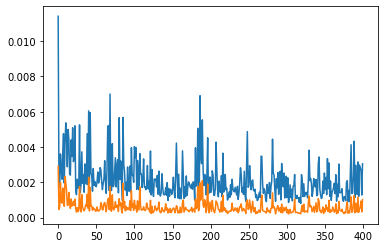

In [61]:
# plt.plot(losses[1:]); 
plt.plot(separate_losses[0,200:]); 
plt.plot(separate_losses[1,200:]); 
# plt.plot(separate_losses[2,50:]); 
# plt.plot(separate_losses[3,50:]); 
# plt.plot(separate_losses[4,50:]); 
# plt.plot(separate_losses[5,50:]); 
# plt.plot(separate_losses[6,0:]);
plt.show()

In [ ]:
losses